In [1]:
import pandas as pd
import json

In [8]:
import pandas as pd
df = pd.read_csv('../data/meet-chrome-1619249926-10-100-0-0.csv', sep='\t', header=None)

In [9]:
def get_sum(x):
    x = x.apply(lambda t: int(t))
    total_data =  x.sum()
    return total_data
    
df.groupby([7]).agg({4: set, 5:set, 1:set, 2:set, 9:get_sum}).reset_index()


,7,4,5,1,2,9
0,0x00001a0a,"{128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134...",{19305.0},{74.125.250.84},{192.168.1.193},99386519.0
1,0x51f8639c,"{840.0, 740.0, 286.0}",{46061.0},{192.168.1.193},{74.125.250.84},51814.0
2,0x8b0007ad,"{1152.0, 1153.0, 1154.0, 1160.0, 1161.0, 1166....",{19305.0},{74.125.250.84},{192.168.1.193},1020103.0
3,0xe2566b2e,"{128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134...",{46061.0},{192.168.1.193},{74.125.250.84},29424096.0
4,0xe5028e4c,"{114.0, 116.0, 119.0, 122.0, 133.0, 135.0, 136...",{46061.0},{192.168.1.193},{74.125.250.84},73839041.0
5,0xecf26bb7,"{1024.0, 1163.0, 1036.0, 1038.0, 912.0, 1046.0...",{46061.0},{192.168.1.193},{74.125.250.84},298402.0
6,0xfa9b9ffb,"{131.0, 145.0, 155.0, 170.0, 173.0, 190.0, 199...",{46061.0},{192.168.1.193},{74.125.250.84},443575556.0
7,0xfd177dc2,"{314.0, 386.0, 435.0, 447.0, 455.0, 462.0, 469...",{19305.0},{74.125.250.84},{192.168.1.193},78056265.0


In [10]:
df1 = df[~pd.isna(df[7])]
#df1.groupby([7]).agg({4: set, 5:set, 1:set, 2:set}).reset_index()
df_inbound = df1[df1[2] == "192.168.1.193"]

In [11]:
df_inbound[9] = df_inbound[9].apply(lambda x: int(x))

/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0x00001a0a
0x8b0007ad
0xfd177dc2


/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

<Figure size 720x216 with 0 Axes>

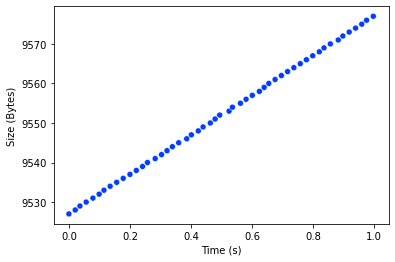

<Figure size 720x216 with 0 Axes>

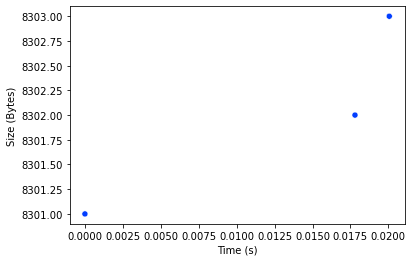

<Figure size 720x216 with 0 Axes>

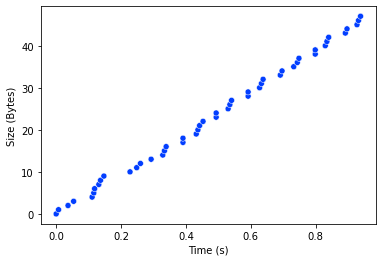

In [12]:
import seaborn as sns, matplotlib.pyplot as plt
#df1 = df[~pd.isna(df[7])]
seq_list = df_inbound[7].unique().tolist()

def diff(x):
    return x.max() - x.min()

for seq in seq_list:
    print(seq)
    plt.figure(figsize=(10,3))
    df2 = df_inbound[df1[7] == seq]
    #print(seq, df2.shape)
    df2[0] = df2[0] - df2[0].min()
    #df_grp = df2.groupby([10]).agg({9: }).reset_index()
    #df_grp = df_grp.sort_values(by=10)
    #df_grp["diff"] = df_grp[10].diff()
    #sns.ecdfplot(df_grp["diff"])
    #print(df_grp.head(20))
    plt.figure()
    df2 = df2[(df2[0] >= 0) & (df2[0] <= 1)]
    sns.scatterplot(data=df2, x=0, y=9, hue=10, palette="bright", legend=False)
    plt.xlabel("Time (s)")
    plt.ylabel("Size (Bytes)")
  
    '''
    df_grp = df2.groupby([10]).agg({9: diff}).reset_index()
    plt.figure()
    sns.ecdfplot(df_grp, x=9)
    '''

In [36]:
seq = "0x000006a8"
df2 = df_inbound[df_inbound[7] == seq]

In [37]:
df2["diff"]  = df2[0].diff()
df2["diff_rtp"] = df2[10].diff()

/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/anaconda3/envs/test/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.2)

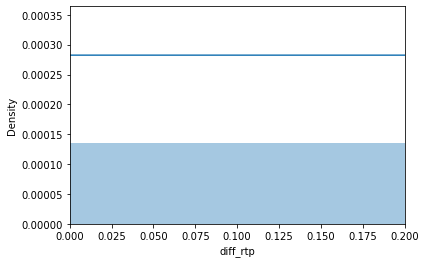

In [38]:
sns.distplot(df2["diff_rtp"])
plt.xlim([0, 0.2])

In [41]:
df_grp = df2.groupby([10]).agg({9: list, "diff": list, "diff_rtp": list}).reset_index()
df_grp
#df_grp.columns = ['_'.join(list(map(str, col))).strip() for col in df_grp.columns.values]

,10,9,diff,diff_rtp
0,503198230.0,"[148, 92, 976, 976, 977, 993]","[nan, 3.999999997006398e-06, 0.00032699999999863394, 1.00000000458067e-06, 9.999999974752427e-07, 9.999999974752427e-07]","[nan, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,503200132.0,"[101, 1082, 1098]","[0.01977899999999977, 4.0000000041118255e-06, 6.799999999884676e-05]","[1902.0, 0.0, 0.0]"
2,503205073.0,"[101, 838, 838, 854]","[0.05472799999999722, 6.000000006167738e-06, 0.00015399999999488045, 2.0000000020559128e-06]","[4941.0, 0.0, 0.0, 0.0]"
3,503206427.0,"[101, 1208, 1208, 1224]","[0.016246000000002425, 3.999999997006398e-06, 9.999999974752427e-07, 1.00000000458067e-06]","[1354.0, 0.0, 0.0, 0.0]"
4,503210478.0,"[109, 1198, 1199, 1199, 1215]","[0.05619699999999739, 4.0000000041118255e-06, 9.999999974752427e-07, 9.999999974752427e-07, 1.00000000458067e-06]","[4051.0, 0.0, 0.0, 0.0, 0.0]"
5,503213082.0,"[101, 1055, 1055, 1056, 1072]","[0.021670999999997775, 9.999999974752427e-07, 1.00000000458067e-06, 0.0, 9.999999974752427e-07]","[2604.0, 0.0, 0.0, 0.0, 0.0]"
6,503216776.0,"[101, 1049, 1049, 1049, 1065]","[0.037345999999999435, 5.999999999062311e-06, 2.0000000020559128e-06, 2.0000000020559128e-06, 9.999999974752427e-07]","[3694.0, 0.0, 0.0, 0.0, 0.0]"
7,503218928.0,"[101, 959, 960, 960, 976]","[0.02594400000000263, 6.999999996537554e-06, 9.999999974752427e-07, 3.000000006636583e-06, 9.999999974752427e-07]","[2152.0, 0.0, 0.0, 0.0, 0.0]"
8,503223075.0,"[101, 923, 923, 924, 940]","[0.04555599999999771, 4.0000000041118255e-06, 0.0015179999999972438, 2.0000000020559128e-06, 9.999999974752427e-07]","[4147.0, 0.0, 0.0, 0.0, 0.0]"
9,503224837.0,"[109, 924, 925, 941]","[0.016784999999998718, 0.0005640000000042278, 3.999999997006398e-06, 9.999999974752427e-07]","[1762.0, 0.0, 0.0, 0.0]"


In [31]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

df_grp

,10,9,diff
0,503604611.0,6,NaN
1,503605170.0,4,559.0
2,503607858.0,4,2688.0
3,503611370.0,5,3512.0
4,503613163.0,6,1793.0
5,503617662.0,7,4499.0
6,503620453.0,7,2791.0
7,503622612.0,6,2159.0
8,503625878.0,6,3266.0
9,503628937.0,6,3059.0


In [32]:
df1.shape

(12872, 11)

10      9         
                       max    mean
0    2109980766.00 1039.00 1038.80
1    2109983646.00  319.00  319.00
2    2109987966.00  695.00  695.00
3    2109992826.00  248.00  248.00
4    2109995616.00 1013.00 1012.50
...            ...     ...     ...
3489 2123366466.00 1110.00 1109.33
3490 2123373126.00 1016.00 1015.75
3491 2123376006.00 1045.00 1044.67
3492 2123378886.00 1203.00 1202.45
3493 2123381766.00 1211.00 1210.13

[3494 rows x 3 columns]

In [37]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.displa
df1[[9,10]]

,9,10
166,1038.00,2109980766.00
168,1039.00,2109980766.00
169,1039.00,2109980766.00
172,1039.00,2109980766.00
174,1039.00,2109980766.00
...,...,...
52788,1210.00,2123381766.00
52789,1211.00,2123381766.00
52790,1211.00,2123381766.00
52793,1211.00,2123381766.00
